# 종합설계1 Demo
## 번역 기반 다언어 MRC 프레임워크

## Main Idea

0. 입력(질문, 지문) 언어 감지

#### 질문

1. 질문을 영어로 변환, 전처리를 통해 키워드 추출
2. 동의어,유의어를 활용한 키워드 증강
3. 키워드 집합을 지문의 언어로 번역하여 집합 재구성

#### 지문

1. 문장단위로 분할
2. 질문(3)의 키워드 집합에 대한 출현 빈도 집계
3. 범위 단위의 번역 우선순위 지정
4. 번역 범위 우선순위에 따른 번역 수행


####  **기초 설정**

SQUAD 데이터셋 중 가장 긴 data에 대하여 데모 수행

```
{'answers': {'answer_start': [602], 'text': ['the Great Desert']},
 'context': "The sky is usually clear above the desert and the sunshine duration is extremely high everywhere in the Sahara. Most of the desert enjoys more than 3,600 h of bright sunshine annually or over 82% of the time and a wide area in the eastern part experiences in excess of 4,000 h of bright sunshine a year or over 91% of the time, and the highest values are very close to the theoretical maximum value. A value of 4,300 h or 98% of the time would be recorded in Upper Egypt (Aswan, Luxor) and in the Nubian Desert (Wadi Halfa). The annual average direct solar irradiation is around 2,800 kWh/(m2 year) in the Great Desert. The Sahara has a huge potential for solar energy production. The constantly high position of the sun, the extremely low relative humidity, the lack of vegetation and rainfall make the Great Desert the hottest continuously large area worldwide and certainly the hottest place on Earth during summertime in some spots. The average high temperature exceeds 38 °C (100.4 °F) - 40 °C (104 °F) during the hottest month nearly everywhere in the desert except at very high mountainous areas. The highest officially recorded average high temperature was 47 °C (116.6 °F) in a remote desert town in the Algerian Desert called Bou Bernous with an elevation of 378 meters above sea level. It's the world's highest recorded average high temperature and only Death Valley, California rivals it. Other hot spots in Algeria such as Adrar, Timimoun, In Salah, Ouallene, Aoulef, Reggane with an elevation between 200 and 400 meters above sea level get slightly lower summer average highs around 46 °C (114.8 °F) during the hottest months of the year. Salah, well known in Algeria for its extreme heat, has an average high temperature of 43.8 °C (110.8 °F), 46.4 °C (115.5 °F), 45.5 (113.9 °F). Furthermore, 41.9 °C (107.4 °F) in June, July, August and September. In fact, there are even hotter spots in the Sahara, but they are located in extremely remote areas, especially in the Azalai, lying in northern Mali. The major part of the desert experiences around 3 – 5 months when the average high strictly exceeds 40 °C (104 °F). The southern central part of the desert experiences up to 6 – 7 months when the average high temperature strictly exceeds 40 °C (104 °F) which shows the constancy and the length of the really hot season in the Sahara. Some examples of this are Bilma, Niger and Faya-Largeau, Chad. The annual average daily temperature exceeds 20 °C (68 °F) everywhere and can approach 30 °C (86 °F) in the hottest regions year-round. However, most of the desert has a value in excess of 25 °C (77 °F). The sand and ground temperatures are even more extreme. During daytime, the sand temperature is extremely high as it can easily reach 80 °C (176 °F) or more. A sand temperature of 83.5 °C (182.3 °F) has been recorded in Port Sudan. Ground temperatures of 72 °C (161.6 °F) have been recorded in the Adrar of Mauritania and a value of 75 °C (167 °F) has been measured in Borkou, northern Chad. Due to lack of cloud cover and very low humidity, the desert usually features high diurnal temperature variations between days and nights. However, it's a myth that the nights are cold after extremely hot days in the Sahara. The average diurnal temperature range is typically between 13 °C (55.4 °F) and 20 °C (68 °F). The lowest values are found along the coastal regions due to high humidity and are often even lower than 10 °C (50 °F), while the highest values are found in inland desert areas where the humidity is the lowest, mainly in the southern Sahara. Still, it's true that winter nights can be cold as it can drop to the freezing point and even below, especially in high-elevation areas.",
 'id': '5728c4163acd2414000dfddf',
 'question': 'What is the largest hottest continuously large area   worldwide?',
 'title': 'Sahara'}
```

In [1]:
example = {'answers': {'answer_start': [602], 'text': ['the Great Desert']},
 'context': "The sky is usually clear above the desert and the sunshine duration is extremely high everywhere in the Sahara. Most of the desert enjoys more than 3,600 h of bright sunshine annually or over 82% of the time and a wide area in the eastern part experiences in excess of 4,000 h of bright sunshine a year or over 91% of the time, and the highest values are very close to the theoretical maximum value. A value of 4,300 h or 98% of the time would be recorded in Upper Egypt (Aswan, Luxor) and in the Nubian Desert (Wadi Halfa). The annual average direct solar irradiation is around 2,800 kWh/(m2 year) in the Great Desert. The Sahara has a huge potential for solar energy production. The constantly high position of the sun, the extremely low relative humidity, the lack of vegetation and rainfall make the Great Desert the hottest continuously large area worldwide and certainly the hottest place on Earth during summertime in some spots. The average high temperature exceeds 38 °C (100.4 °F) - 40 °C (104 °F) during the hottest month nearly everywhere in the desert except at very high mountainous areas. The highest officially recorded average high temperature was 47 °C (116.6 °F) in a remote desert town in the Algerian Desert called Bou Bernous with an elevation of 378 meters above sea level. It's the world's highest recorded average high temperature and only Death Valley, California rivals it. Other hot spots in Algeria such as Adrar, Timimoun, In Salah, Ouallene, Aoulef, Reggane with an elevation between 200 and 400 meters above sea level get slightly lower summer average highs around 46 °C (114.8 °F) during the hottest months of the year. Salah, well known in Algeria for its extreme heat, has an average high temperature of 43.8 °C (110.8 °F), 46.4 °C (115.5 °F), 45.5 (113.9 °F). Furthermore, 41.9 °C (107.4 °F) in June, July, August and September. In fact, there are even hotter spots in the Sahara, but they are located in extremely remote areas, especially in the Azalai, lying in northern Mali. The major part of the desert experiences around 3 – 5 months when the average high strictly exceeds 40 °C (104 °F). The southern central part of the desert experiences up to 6 – 7 months when the average high temperature strictly exceeds 40 °C (104 °F) which shows the constancy and the length of the really hot season in the Sahara. Some examples of this are Bilma, Niger and Faya-Largeau, Chad. The annual average daily temperature exceeds 20 °C (68 °F) everywhere and can approach 30 °C (86 °F) in the hottest regions year-round. However, most of the desert has a value in excess of 25 °C (77 °F). The sand and ground temperatures are even more extreme. During daytime, the sand temperature is extremely high as it can easily reach 80 °C (176 °F) or more. A sand temperature of 83.5 °C (182.3 °F) has been recorded in Port Sudan. Ground temperatures of 72 °C (161.6 °F) have been recorded in the Adrar of Mauritania and a value of 75 °C (167 °F) has been measured in Borkou, northern Chad. Due to lack of cloud cover and very low humidity, the desert usually features high diurnal temperature variations between days and nights. However, it's a myth that the nights are cold after extremely hot days in the Sahara. The average diurnal temperature range is typically between 13 °C (55.4 °F) and 20 °C (68 °F). The lowest values are found along the coastal regions due to high humidity and are often even lower than 10 °C (50 °F), while the highest values are found in inland desert areas where the humidity is the lowest, mainly in the southern Sahara. Still, it's true that winter nights can be cold as it can drop to the freezing point and even below, especially in high-elevation areas.",
 'id': '5728c4163acd2414000dfddf',
 'question': 'What is the largest hottest continuously large area   worldwide?',
 'title': 'Sahara'}

In [2]:
question = "世界で最も暑く継続的に広い地域はどれですか？" # Answer : the Great Desert 

In [3]:
context = "하늘은 일반적으로 사막 위의 맑음이며 일조 지속 시간은 사하라 사막의 모든 곳에서 매우 높습니다. 대부분의 사막은 연간 3,600시간 이상의 밝은 일조 또는 82% 이상의 시간을 경험하고 동부의 넓은 지역은 연간 4,000시간 이상의 밝은 일조 또는 91% 이상의 시간을 경험하며, 가장 높은 값은 이론상 최대값에 매우 가깝습니다. 시간의 98%인 4,300시간의 값은 상이집트(아스완, 룩소르)와 누비아 사막(와디 할파)에서 기록될 것입니다. 대사막의 연간 평균 직사광선 조사량은 약 2,800kWh/(m2/년)입니다. 사하라 사막은 태양 에너지 생산에 대한 거대한 잠재력을 가지고 있습니다. 지속적으로 높은 태양의 위치, 극도로 낮은 상대 습도, 초목과 강우의 부족으로 인해 대사막은 전 세계적으로 계속해서 가장 더운 지역이 되었으며 여름에는 확실히 어떤 지역에서는 지구상에서 가장 더운 곳이 되었습니다. 평균 고온은 매우 높은 산악 지역을 제외하고 사막의 거의 모든 곳에서 가장 더운 달 동안 38°C(100.4°F) - 40°C(104°F)를 초과합니다. 공식적으로 기록된 최고 평균 최고 기온은 해발 378m의 Bou Bernous라고 불리는 알제리 사막의 외딴 사막 마을에서 47°C(116.6°F)였습니다. 그것은 세계에서 가장 높은 기록된 평균 고온이며 캘리포니아의 데스 밸리(Death Valley)만이 이에 필적합니다. Adrar, Timimoun, In Salah, Ouallene, Aoulef, Reggane과 같은 알제리의 다른 핫스팟은 해발 200~400미터 높이에서 가장 더운 달 동안 46°C(114.8°F) 주변에서 약간 더 낮은 여름 평균 최고치를 얻습니다. 그 해. 알제리에서 극심한 더위로 잘 알려진 Salah의 평균 고온은 43.8°C(110.8°F), 46.4°C(115.5°F), 45.5(113.9°F)입니다. 또한 6월, 7월, 8월, 9월에는 41.9°C(107.4°F)입니다. 사실, 사하라 사막에는 더 뜨거운 곳이 있지만 그들은 극도로 외딴 지역, 특히 북부 말리의 아잘라이 지역에 위치하고 있습니다. 사막의 대부분은 평균 최고 온도가 40°C(104°F)를 엄격히 초과하는 약 3~5개월을 경험합니다. 사막의 남쪽 중앙 부분은 평균 고온이 40°C(104°F)를 엄격히 초과하는 최대 6-7개월을 경험하며 이는 사하라 사막의 정말 더운 계절의 지속성과 길이를 보여줍니다. 이에 대한 몇 가지 예는 니제르의 Bilma와 Chad의 Faya-Largeau입니다. 연간 평균 일일 온도는 모든 곳에서 20°C(68°F)를 초과하고 연중 가장 더운 지역에서는 30°C(86°F)에 도달할 수 있습니다. 그러나 대부분의 사막은 25°C(77°F)를 초과하는 값을 가지고 있습니다. 모래와 땅의 온도는 훨씬 더 극단적입니다. 주간에는 모래 온도가 80°C(176°F) 이상에 쉽게 도달할 수 있으므로 매우 높습니다. 포트 수단의 모래 온도는 83.5 °C(182.3 °F)로 기록되었습니다. 72°C(161.6°F)의 지상 온도는 모리타니의 Adarr에서 기록되었으며 75°C(167°F)의 값은 북부 차드의 Borkou에서 측정되었습니다. 구름이 적고 습도가 매우 낮기 때문에 사막은 일반적으로 낮과 밤의 일교차가 높습니다. 그러나 사하라 사막에서 매우 더운 날이 지나면 밤이 춥다는 것은 신화입니다. 평균 주간 온도 범위는 일반적으로 13°C(55.4°F)에서 20°C(68°F) 사이입니다. 가장 낮은 값은 높은 습도로 인해 해안 지역에서 발견되며 종종 10°C(50°F)보다 더 낮습니다. 반면 가장 높은 값은 습도가 가장 낮은 내륙 사막 지역, 주로 남부 사하라 사막에서 발견됩니다. . 그래도 겨울 밤은 영하로 떨어질 수 있고 특히 고도가 높은 지역에서는 영하로 떨어질 수 있기 때문에 추울 수 있는 것이 사실입니다."

#### **0.입력 언어 감지**

In [4]:
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from googletrans import Translator
translator = Translator()

In [9]:
lang_question = translator.detect(question).lang
lang_context = translator.detect(context).lang

In [12]:
print("Language : question({}), context({})".format(lang_question, lang_context))

Language : question(ja), context(ko)


### **질문**



#### **1. 질문 번역 및 키워드 추출**

질문 영어 번역

In [14]:
question_en = translator.translate(question, dest='en', src=lang_question).text
print(question_en)

Which is the hottest and continuous area in the world?


전처리를 통한 영어 키워드 집합 구성

- nltk(Natural Language Tool Kit) 패키지 설치

In [15]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

- 전처리 작업
  + remove special character
  + tokenize
  + extract certain POS
  + remove stopwords

In [28]:
import re

print("Source :", question_en)

question_prep = question_en

# lower
question_prep.lower()
print("Lower :", question_prep)

# remove special character
question_prep = re.sub(r'[^a-zA-Z0-9]', ' ', question_prep)
print("Remove special character :", question_prep)

# tokenize
words = nltk.tokenize.word_tokenize(question_prep)
print("Tokenizing : ", words)

# POS tagging
postagged = nltk.tag.pos_tag(words)
print("Pos-tagging :", postagged)

# extract certain POS (명사, 동사, 형용사)
pos = ['NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS'] 

extracted = []
for word in postagged:
  if word[1] in pos:
      extracted.append(word[0])
print("POS Extraction : ", extracted)

# remove stopwords
keywords_en = []
for word in extracted:
  if word not in nltk.corpus.stopwords.words('english'):
      keywords_en.append(word)
print("Keyword_en :", keywords_en)


Source : Which is the hottest and continuous area in the world?
Lower : Which is the hottest and continuous area in the world?
Remove special character : Which is the hottest and continuous area in the world 
Tokenizing :  ['Which', 'is', 'the', 'hottest', 'and', 'continuous', 'area', 'in', 'the', 'world']
Pos-tagging : [('Which', 'WDT'), ('is', 'VBZ'), ('the', 'DT'), ('hottest', 'NN'), ('and', 'CC'), ('continuous', 'JJ'), ('area', 'NN'), ('in', 'IN'), ('the', 'DT'), ('world', 'NN')]
POS Extraction :  ['is', 'hottest', 'continuous', 'area', 'world']
Keyword_en : ['hottest', 'continuous', 'area', 'world']


#### **2. 동의어, 유의어를 활용한 키워드 증강**



WordsAPI 연결

In [38]:
import requests
import json

url = "https://wordsapiv1.p.rapidapi.com/words/" # request = url + word + "/similarTo"
rel = "similarTo"

headers = {
	"X-RapidAPI-Key": "c0ed2e029bmsh5d858667e5f9cbbp1fb318jsnc96cad8b4d64",
	"X-RapidAPI-Host": "wordsapiv1.p.rapidapi.com"
}

키워드 증강

In [43]:
from pprint import pprint as pp

synonyms_en = dict()
for keyword in keywords_en:
  requestUrl = "".join([url, keyword, "/", rel])
  response = requests.request("GET", requestUrl, headers=headers)
  synonyms_en[keyword] = json.loads(response.text)[rel]

pp(synonyms_en)

{'area': [],
 'continuous': ['unremitting',
                'sustained',
                'unceasing',
                'around-the-clock',
                'ceaseless',
                'consecutive',
                'constant',
                'continual',
                'day-and-night',
                'dogging',
                'endless',
                'free burning',
                'incessant',
                'never-ending',
                'nonstop',
                'perpetual',
                'persisting',
                'round-the-clock',
                'straight'],
 'hottest': [],
 'world': ['international']}


#### **3. 키워드 집합을 지문의 언어로 번역하여 재구성**

In [49]:
synonyms_target = {}
for k, syn in synonyms_en.items():
  tk = translator.translate(k, dest=lang_context, src='en').text
  ts = [translator.translate(s, dest=lang_context, src='en').text for s in syn]
  ts = list(set(ts)) # 중복 제거
  synonyms_target[tk] = ts

pp(synonyms_target)

{'가장 뜨거운': [],
 '마디 없는': ['지속',
           '빈번한',
           '24 시간',
           '무료 화상',
           '낮과 밤',
           '24 일',
           '끝이 없습니다',
           '똑바로',
           '논스톱',
           '강아지',
           '끊임없는',
           '연속',
           '지속되었습니다',
           '연이은',
           '끝없는'],
 '세계': ['국제적인'],
 '지역': []}


### 지문

#### **1. 문장단위 분할**

In [47]:
!pip install kss #Korean Sentence Splitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.4 MB 2.0 MB/s 
     |████████████████████████████████| 175 kB 57.4 MB/s 
  Created wheel for kss: filename=kss-3.4.2-py3-none-any.whl size=42448069 sha256=8f7662a3b22e0762ca2b13863c8cb543d5d982ed742f539f8bfd77727beeaf26
  Stored in directory: /root/.cache/pip/wheels/ef/22/aa/6399b60516a067ec97fa6599fb2d472aeb25e3f9ee6dae3224
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=deac7d340db74d45215cb039127c4c5064c4b3fd24190071d2f441d2081e19f0
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built kss emoji


In [48]:
import kss

sentence_ = [sent for sent in kss.split_sentences(context)]
sentence_

[Korean Sentence Splitter]: Initializing Pynori...


['하늘은 일반적으로 사막 위의 맑음이며 일조 지속 시간은 사하라 사막의 모든 곳에서 매우 높습니다.',
 '대부분의 사막은 연간 3,600시간 이상의 밝은 일조 또는 82% 이상의 시간을 경험하고 동부의 넓은 지역은 연간 4,000시간 이상의 밝은 일조 또는 91% 이상의 시간을 경험하며, 가장 높은 값은 이론상 최대값에 매우 가깝습니다.',
 '시간의 98%인 4,300시간의 값은 상이집트(아스완, 룩소르)와 누비아 사막(와디 할파)에서 기록될 것입니다.',
 '대사막의 연간 평균 직사광선 조사량은 약 2,800kWh/(m2/년)입니다.',
 '사하라 사막은 태양 에너지 생산에 대한 거대한 잠재력을 가지고 있습니다.',
 '지속적으로 높은 태양의 위치, 극도로 낮은 상대 습도, 초목과 강우의 부족으로 인해 대사막은 전 세계적으로 계속해서 가장 더운 지역이 되었으며 여름에는 확실히 어떤 지역에서는 지구상에서 가장 더운 곳이 되었습니다.',
 '평균 고온은 매우 높은 산악 지역을 제외하고 사막의 거의 모든 곳에서 가장 더운 달 동안 38°C(100.4°F) - 40°C(104°F)를 초과합니다.',
 '공식적으로 기록된 최고 평균 최고 기온은 해발 378m의 Bou Bernous라고 불리는 알제리 사막의 외딴 사막 마을에서 47°C(116.6°F)였습니다.',
 '그것은 세계에서 가장 높은 기록된 평균 고온이며 캘리포니아의 데스 밸리(Death Valley)만이 이에 필적합니다.',
 'Adrar, Timimoun, In Salah, Ouallene, Aoulef, Reggane과 같은 알제리의 다른 핫스팟은 해발 200~400미터 높이에서 가장 더운 달 동안 46°C(114.8°F) 주변에서 약간 더 낮은 여름 평균 최고치를 얻습니다.',
 '그',
 '해. 알제리에서 극심한 더위로 잘 알려진 Salah의 평균 고온은 43.8°C(110.8°F), 46.4°C(115.5°F), 45.5(113.9°F)입니다.',
 '또한 6월, 7월, 8월, 9월에는 41.

In [83]:
len(sentence_)

29

#### **2. 키워드 집합에 대한 출현 빈도 집계**

In [98]:
countedWord = []

In [99]:
count = [0] * len(sentence_) # init count to zero

for i, sent in enumerate(sentence_):
  for k, syn in synonyms_target.items():
    # count
    if sent.find(k) != -1:
      count[i] += 1
      countedWord.append(k) # for check counted word
    for s in syn:
      if sent.find(s) != -1:
        count[i] += 1
        countedWord.append(s) # for check counted word

print(count)
print(set(countedWord))

[1, 1, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1]
{'지속', '지역', '낮과 밤', '세계'}


#### **3. 범위 단위의 번역 우선순위 지정**

범위(앞 5 문장)내 count 합산 : addUp




In [84]:
bound = 4 # + self = 5

addUp = [0] * len(count) # init sum to zero

for i in range(len(addUp)):
  if i == len(addUp) - 1: # last
    addUp[i] = sum(count[i-bound:]) # cuz i+1 : out of range
  elif i >= bound:
    addUp[i] = sum(count[i-bound:i+1])

print(addUp)

[0, 0, 0, 0, 2, 4, 4, 4, 5, 5, 2, 1, 1, 1, 1, 2, 2, 3, 2, 2, 1, 1, 0, 1, 1, 1, 2, 3, 3]


sum의 내림차순에 따라 우선순위 지정

In [85]:
import numpy as np

np_addUp = np.array(addUp)

desc_addUp = np.sort(np_addUp)[::-1] # 내림차순 정렬
desc_idxes = np.argsort(np_addUp)[::-1] # 내림차순 정렬된 인덱스

print(desc_addUp)
print(desc_idxes)

[5 5 4 4 4 3 3 3 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
[ 8  9  5  6  7 28 17 27 26  4 19 18 16 15 10 11 14 12 13 20 21 23 24 25
 22  3  2  1  0]


In [86]:
priority = [0] * len(addUp)
for i, idx in enumerate(desc_idxes):
  priority[idx] = i # assign priority from 0(hign) to last(low)

print(priority)

[28, 27, 26, 25, 9, 2, 3, 4, 0, 1, 14, 15, 17, 18, 16, 13, 12, 6, 11, 10, 19, 20, 24, 21, 22, 23, 8, 7, 5]


#### **4. 번역 범위 우선순위에 따른 번역 수행**

In [ ]:

"""
# priority 오름차순 정렬 인덱스 = sum 내림차순 정렬 인덱스

np_priority = np.array(priority)
asc_idxes = np.argsort(np_priority) # priority 오름차순 정렬 인덱스
print(asc_idxes)

# [ 9  8  5  7  6 27 17 28  4 10 18  3 16 15  2  1 26 19 14 11 12 13 20 21
 23 24 25  0 22]

# 굳이 priority 운영 필요 없음

"""

번역 범위 제한 (treshold)

In [91]:
treshold = int(len(sentence_) / 3) # 29 / 3 = 9

# limit
part_idxes = desc_idxes[:treshold]

print(part_idxes)

[ 8  9  5  6  7 28 17 27 26]


tFlag & translated로 부분 번역

> 우선번역되는 범위만을 추출하여 출력

In [92]:
div = []
for i in range(treshold):
  pi = part_idxes[i]

  if pi == len(desc_idxes) - 1: # last
    div.append("".join(sentence_[pi-bound:])) # cuz p+1 : out of range
  elif pi >= bound:
    div.append("".join(sentence_[pi-bound:pi+1]))

div

['사하라 사막은 태양 에너지 생산에 대한 거대한 잠재력을 가지고 있습니다.지속적으로 높은 태양의 위치, 극도로 낮은 상대 습도, 초목과 강우의 부족으로 인해 대사막은 전 세계적으로 계속해서 가장 더운 지역이 되었으며 여름에는 확실히 어떤 지역에서는 지구상에서 가장 더운 곳이 되었습니다.평균 고온은 매우 높은 산악 지역을 제외하고 사막의 거의 모든 곳에서 가장 더운 달 동안 38°C(100.4°F) - 40°C(104°F)를 초과합니다.공식적으로 기록된 최고 평균 최고 기온은 해발 378m의 Bou Bernous라고 불리는 알제리 사막의 외딴 사막 마을에서 47°C(116.6°F)였습니다.그것은 세계에서 가장 높은 기록된 평균 고온이며 캘리포니아의 데스 밸리(Death Valley)만이 이에 필적합니다.',
 '지속적으로 높은 태양의 위치, 극도로 낮은 상대 습도, 초목과 강우의 부족으로 인해 대사막은 전 세계적으로 계속해서 가장 더운 지역이 되었으며 여름에는 확실히 어떤 지역에서는 지구상에서 가장 더운 곳이 되었습니다.평균 고온은 매우 높은 산악 지역을 제외하고 사막의 거의 모든 곳에서 가장 더운 달 동안 38°C(100.4°F) - 40°C(104°F)를 초과합니다.공식적으로 기록된 최고 평균 최고 기온은 해발 378m의 Bou Bernous라고 불리는 알제리 사막의 외딴 사막 마을에서 47°C(116.6°F)였습니다.그것은 세계에서 가장 높은 기록된 평균 고온이며 캘리포니아의 데스 밸리(Death Valley)만이 이에 필적합니다.Adrar, Timimoun, In Salah, Ouallene, Aoulef, Reggane과 같은 알제리의 다른 핫스팟은 해발 200~400미터 높이에서 가장 더운 달 동안 46°C(114.8°F) 주변에서 약간 더 낮은 여름 평균 최고치를 얻습니다.',
 '대부분의 사막은 연간 3,600시간 이상의 밝은 일조 또는 82% 이상의 시간을 경험하고 동부의 넓은 지역은 연간 4,000시간 이상의 밝은 일조 또는 91% 이상의 시

실제 원문 (answer 부분 문장) 비교

In [95]:
origin = nltk.sent_tokenize(example["context"])
origin

['The sky is usually clear above the desert and the sunshine duration is extremely high everywhere in the Sahara.',
 'Most of the desert enjoys more than 3,600 h of bright sunshine annually or over 82% of the time and a wide area in the eastern part experiences in excess of 4,000 h of bright sunshine a year or over 91% of the time, and the highest values are very close to the theoretical maximum value.',
 'A value of 4,300 h or 98% of the time would be recorded in Upper Egypt (Aswan, Luxor) and in the Nubian Desert (Wadi Halfa).',
 'The annual average direct solar irradiation is around 2,800 kWh/(m2 year) in the Great Desert.',
 'The Sahara has a huge potential for solar energy production.',
 'The constantly high position of the sun, the extremely low relative humidity, the lack of vegetation and rainfall make the Great Desert the hottest continuously large area worldwide and certainly the hottest place on Earth during summertime in some spots.',
 'The average high temperature exceeds 

In [96]:
sentence_

['하늘은 일반적으로 사막 위의 맑음이며 일조 지속 시간은 사하라 사막의 모든 곳에서 매우 높습니다.',
 '대부분의 사막은 연간 3,600시간 이상의 밝은 일조 또는 82% 이상의 시간을 경험하고 동부의 넓은 지역은 연간 4,000시간 이상의 밝은 일조 또는 91% 이상의 시간을 경험하며, 가장 높은 값은 이론상 최대값에 매우 가깝습니다.',
 '시간의 98%인 4,300시간의 값은 상이집트(아스완, 룩소르)와 누비아 사막(와디 할파)에서 기록될 것입니다.',
 '대사막의 연간 평균 직사광선 조사량은 약 2,800kWh/(m2/년)입니다.',
 '사하라 사막은 태양 에너지 생산에 대한 거대한 잠재력을 가지고 있습니다.',
 '지속적으로 높은 태양의 위치, 극도로 낮은 상대 습도, 초목과 강우의 부족으로 인해 대사막은 전 세계적으로 계속해서 가장 더운 지역이 되었으며 여름에는 확실히 어떤 지역에서는 지구상에서 가장 더운 곳이 되었습니다.',
 '평균 고온은 매우 높은 산악 지역을 제외하고 사막의 거의 모든 곳에서 가장 더운 달 동안 38°C(100.4°F) - 40°C(104°F)를 초과합니다.',
 '공식적으로 기록된 최고 평균 최고 기온은 해발 378m의 Bou Bernous라고 불리는 알제리 사막의 외딴 사막 마을에서 47°C(116.6°F)였습니다.',
 '그것은 세계에서 가장 높은 기록된 평균 고온이며 캘리포니아의 데스 밸리(Death Valley)만이 이에 필적합니다.',
 'Adrar, Timimoun, In Salah, Ouallene, Aoulef, Reggane과 같은 알제리의 다른 핫스팟은 해발 200~400미터 높이에서 가장 더운 달 동안 46°C(114.8°F) 주변에서 약간 더 낮은 여름 평균 최고치를 얻습니다.',
 '그',
 '해. 알제리에서 극심한 더위로 잘 알려진 Salah의 평균 고온은 43.8°C(110.8°F), 46.4°C(115.5°F), 45.5(113.9°F)입니다.',
 '또한 6월, 7월, 8월, 9월에는 41.

answer : the Great Desert 
 - origin[3], origin[5]
 - sentence_[3], sentence_[5]

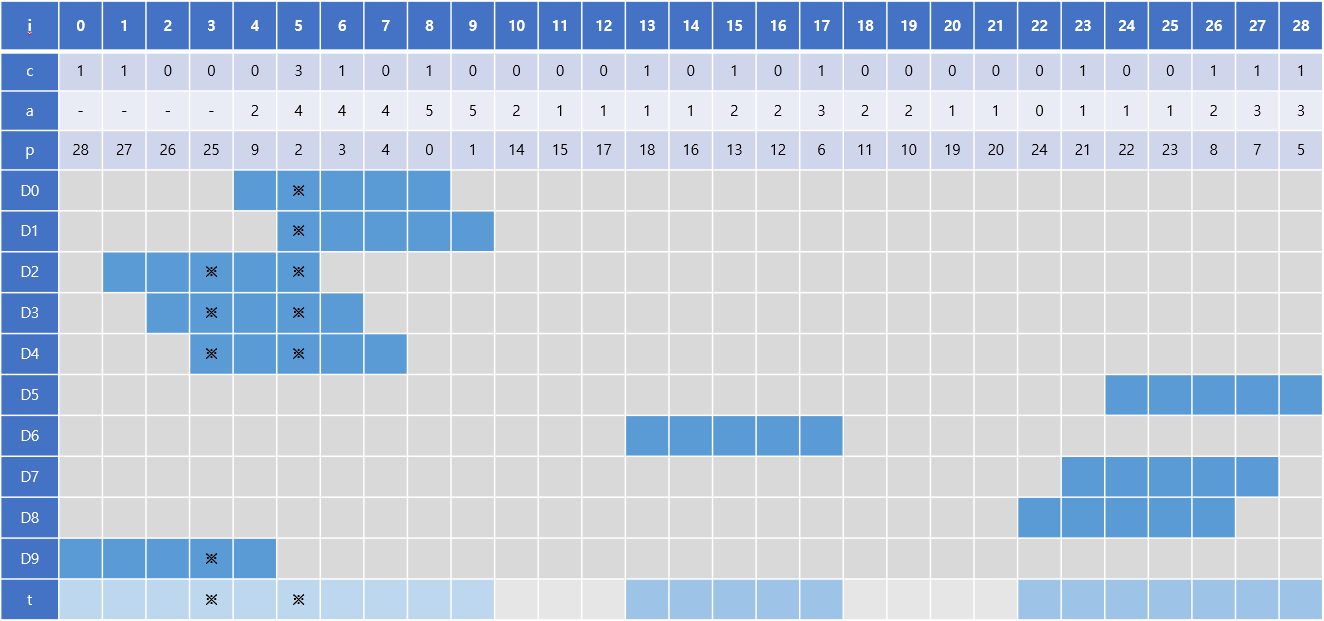